## Introduction to radio observations

To observe the Universe at radio wavelengths, astronomers use **giant radio telescopes** all around the world.

Some famous radio telescopes are:

- **Effelsberg Telescope (Germany)**  
  100 m single-dish diameter, fully steerable

- **FAST (China)**  
  300 m single-dish diameter, not steerable

- **MeerKAT (South Africa)**  
  64 dishes, each with a diameter of 13.5 m

---

## Telescope beams and resolution

Radio telescopes do not see the whole sky at once.  
Instead, they scan the sky in small patches called **beams**.

The size of a beam is called the **angular resolution** of the telescope.

Typical radio telescopes have resolutions of a few **arcseconds**.

This is roughly equivalent to being able to see a **1 euro coin from 4 km away**.

---

## What is an arcsecond?

- A full circle has **360 degrees**
- Each degree is divided into **3600 arcseconds**

So:
1 arcsecond = 1 / 3600 of a degree

---

## 1. What fraction of the entire sky can a telescope see at any given time?

To answer this, we need a bit of geometry.

First, we convert degrees into a special unit called **radians**.  
In mathematics and physics, angles in formulas are usually written in radians.

A full half-circle is:

180 degrees = π radians


So the conversion is:

### Radians = degrees × π / 180

---

## Beam area on the sky

We approximate the telescope beam as a **circular patch** on the sky.

The area of a circle is:

### Beam area = π × (θ / 2)²

where:
- **θ** is the beam width in **radians**

The beam area is measured in **steradians** (or $\text{radians}^2$), which are units of area on the sky.

---

## Fraction of the sky

The total area of the entire sky is:

### Full sky area = 4 × π steradians

The fraction of the sky the telescope can see at one time is:

### Fraction of sky = beam area / full sky area


In [1]:
pi = 3.1415926535
beam_width_arcsec = 2.5 # arcseconds
beam_width_degree = beam_width_arcsec / 3600 # degrees

beam_width_radians = beam_width_degree * pi/180
beam_area = pi * (beam_width_radians/2)**2
sky_area = 4 * pi

print(beam_area/sky_area)

9.181418178810263e-12


This is a **very tiny fraction of the entire sky**.

A single observation only sees roughly **one one-hundred-billionth of the sky**!

This means there is a huge area of sky to search, which requires **a lot of computing power and observing time**.

---

## 2. What does a telescope record?

A radio telescope is essentially a giant bucket for collecting photons (packets of light),  
in our case **radio photons**.

We have to tell the telescope a **time resolution**, for example 1 second.  
This means the telescope collects photons for 1 second and then tells us how many it detected.  
Then it collects photons for another 1 second, tells us how many it detected, and continues doing this for as long as we want, called an **observation** — usually lasts about an hour.

We call this kind of data a **time series**.

A time series is one-dimensional (1D) data, just like a Python list or a NumPy array.

### Example time series

[23, 18, 56, 12, 45, ...]


Here, the telescope detected:
- 23 photons in the first second  
- 18 photons in the second second  
- 56 photons in the third second  
- and so on  

---

### Where do these radio photons come from?

Most of the radio photons detected by a telescope do **not** come from space.  
They are actually **contamination from Earth**.

### Man-made sources
- Mobile phones and cell towers  
- Wi-Fi and Bluetooth  
- Radio and TV transmitters  
- Satellites  
- Electrical equipment  

We call these signals **radio-frequency interference** (or **RFI** for short).

RFI is a big problem for radio astronomers because it makes detecting faint signals from space very difficult.  
This is why radio telescopes are often built far away from cities, for example in forests or deserts.

---

### Other nearby natural sources

There are also natural sources close to Earth, such as:
- The Sun  
- The Moon (radio waves from the Sun can reflect off the Moon)  
- Earth’s atmosphere and ionosphere  
- Lightning  

These sources are usually manageable.  
For example: **don’t point your telescope at the Sun 🙂**

---

### Signals from space

All of the sources above make up **more than 99.9%** of the photons a radio telescope detects.

Only a very small fraction comes from deep space, such as:
- Stars and gas in the Milky Way galaxy  
- Other galaxies  
- Supernovae  
- and **pulsars!**

---

### Noise

All of these sources add together to make a **combined radio background**.

When we look at a time series from a radio telescope, the data looks random and messy.  
We call this **noise**.

Imagine you are standing in a crowded room with hundreds of people talking, laughing, and shouting.  
From the middle of the room, you cannot hear every individual conversation.  
Instead, you hear the combined sound of the whole room — this is **noise**.

It is the job of the astronomer to find a **faint whisper** coming from somewhere in the room.


Let's see what a time series from a telescope looks like. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

time, noise = np.load("data/channel_01_telescope_timeseries.npy")

This is some simulated data taken every 1 second for 1 hour. As you will see the photon number is quite small, because I wanted to make it easier to work with. In real data we are detecting trillions of trillions of photons every second!

Let's try to plot it now.

Text(0.5, 0, 'Observation time (seconds)')

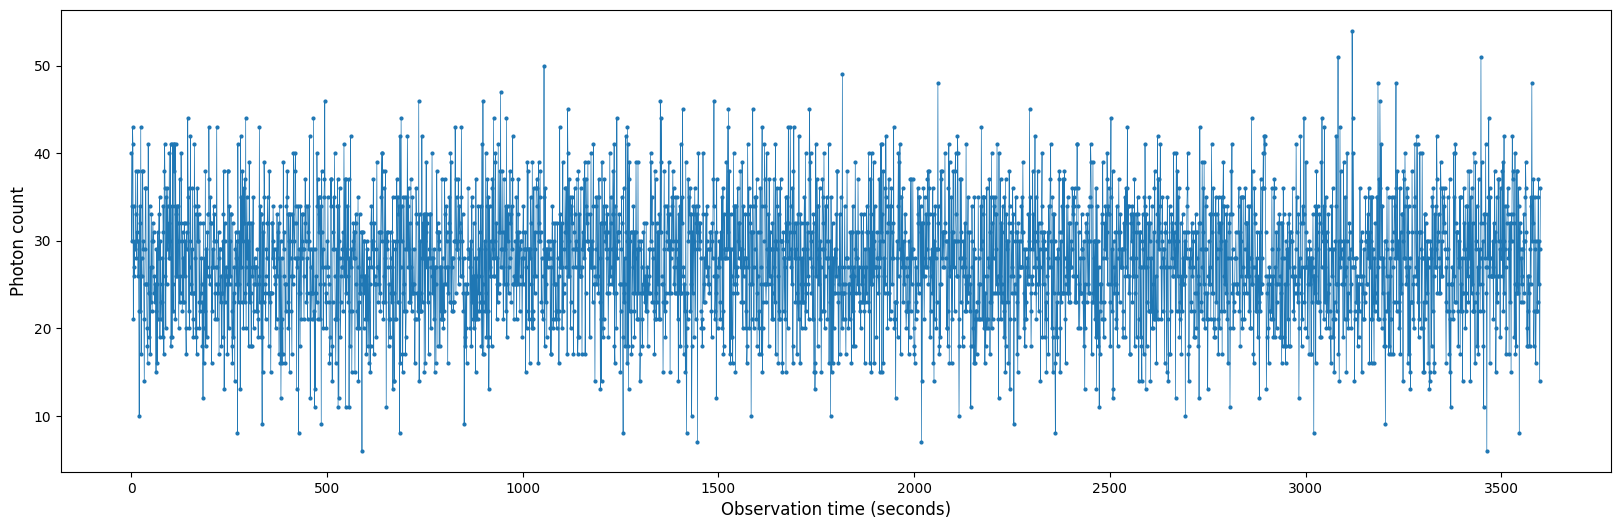

In [18]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(time, noise,  ls='-', lw=0.5, marker='o', markersize=2)

ax.set_ylabel('Photon count', fontsize=12)
ax.set_xlabel('Observation time (seconds)', fontsize=12)

# ax.set_xlim([0, 100]) # uncomment (remove the first #) this to see what the first 100 seconds of data look like

Nice! That does look like a random mess.

When we take real observations, a radio telescope can record **multiple time series at the same time**, each at a different **radio frequency** — you can think of these as different *“colours”* of radio light.

This is similar to visible light, where different colours correspond to different wavelengths or different frequencies of light.

### Frequency and wavelength

Frequency tells us how many oscillations a light wave makes every second.

The unit of frequency is **Hertz (Hz)**, which means “per second”.

Wavelength (written as **λ**) and frequency (**f**) are related through the speed of light (**c**):

### $f = \frac{c}{\lambda}$

This means:
- short wavelength → high frequency  
- long wavelength → low frequency  


### Radio frequency channels

A time series measured at a single radio frequency is called a **channel**.

In the data folder, we have **8 different channels**, each observing the sky at a slightly different radio frequency.

Let’s plot all of them and see what they look like.


In [19]:
# load all 8 channels using a list comprehension
n_channels = 8
data = [np.load(f"data/channel_0{i+1}_telescope_timeseries.npy") for i in range(n_channels)]

In [20]:
# lets give the data a nice rainbow colour
cmap = plt.cm.rainbow
colors = cmap(np.linspace(0, 1, n_channels))

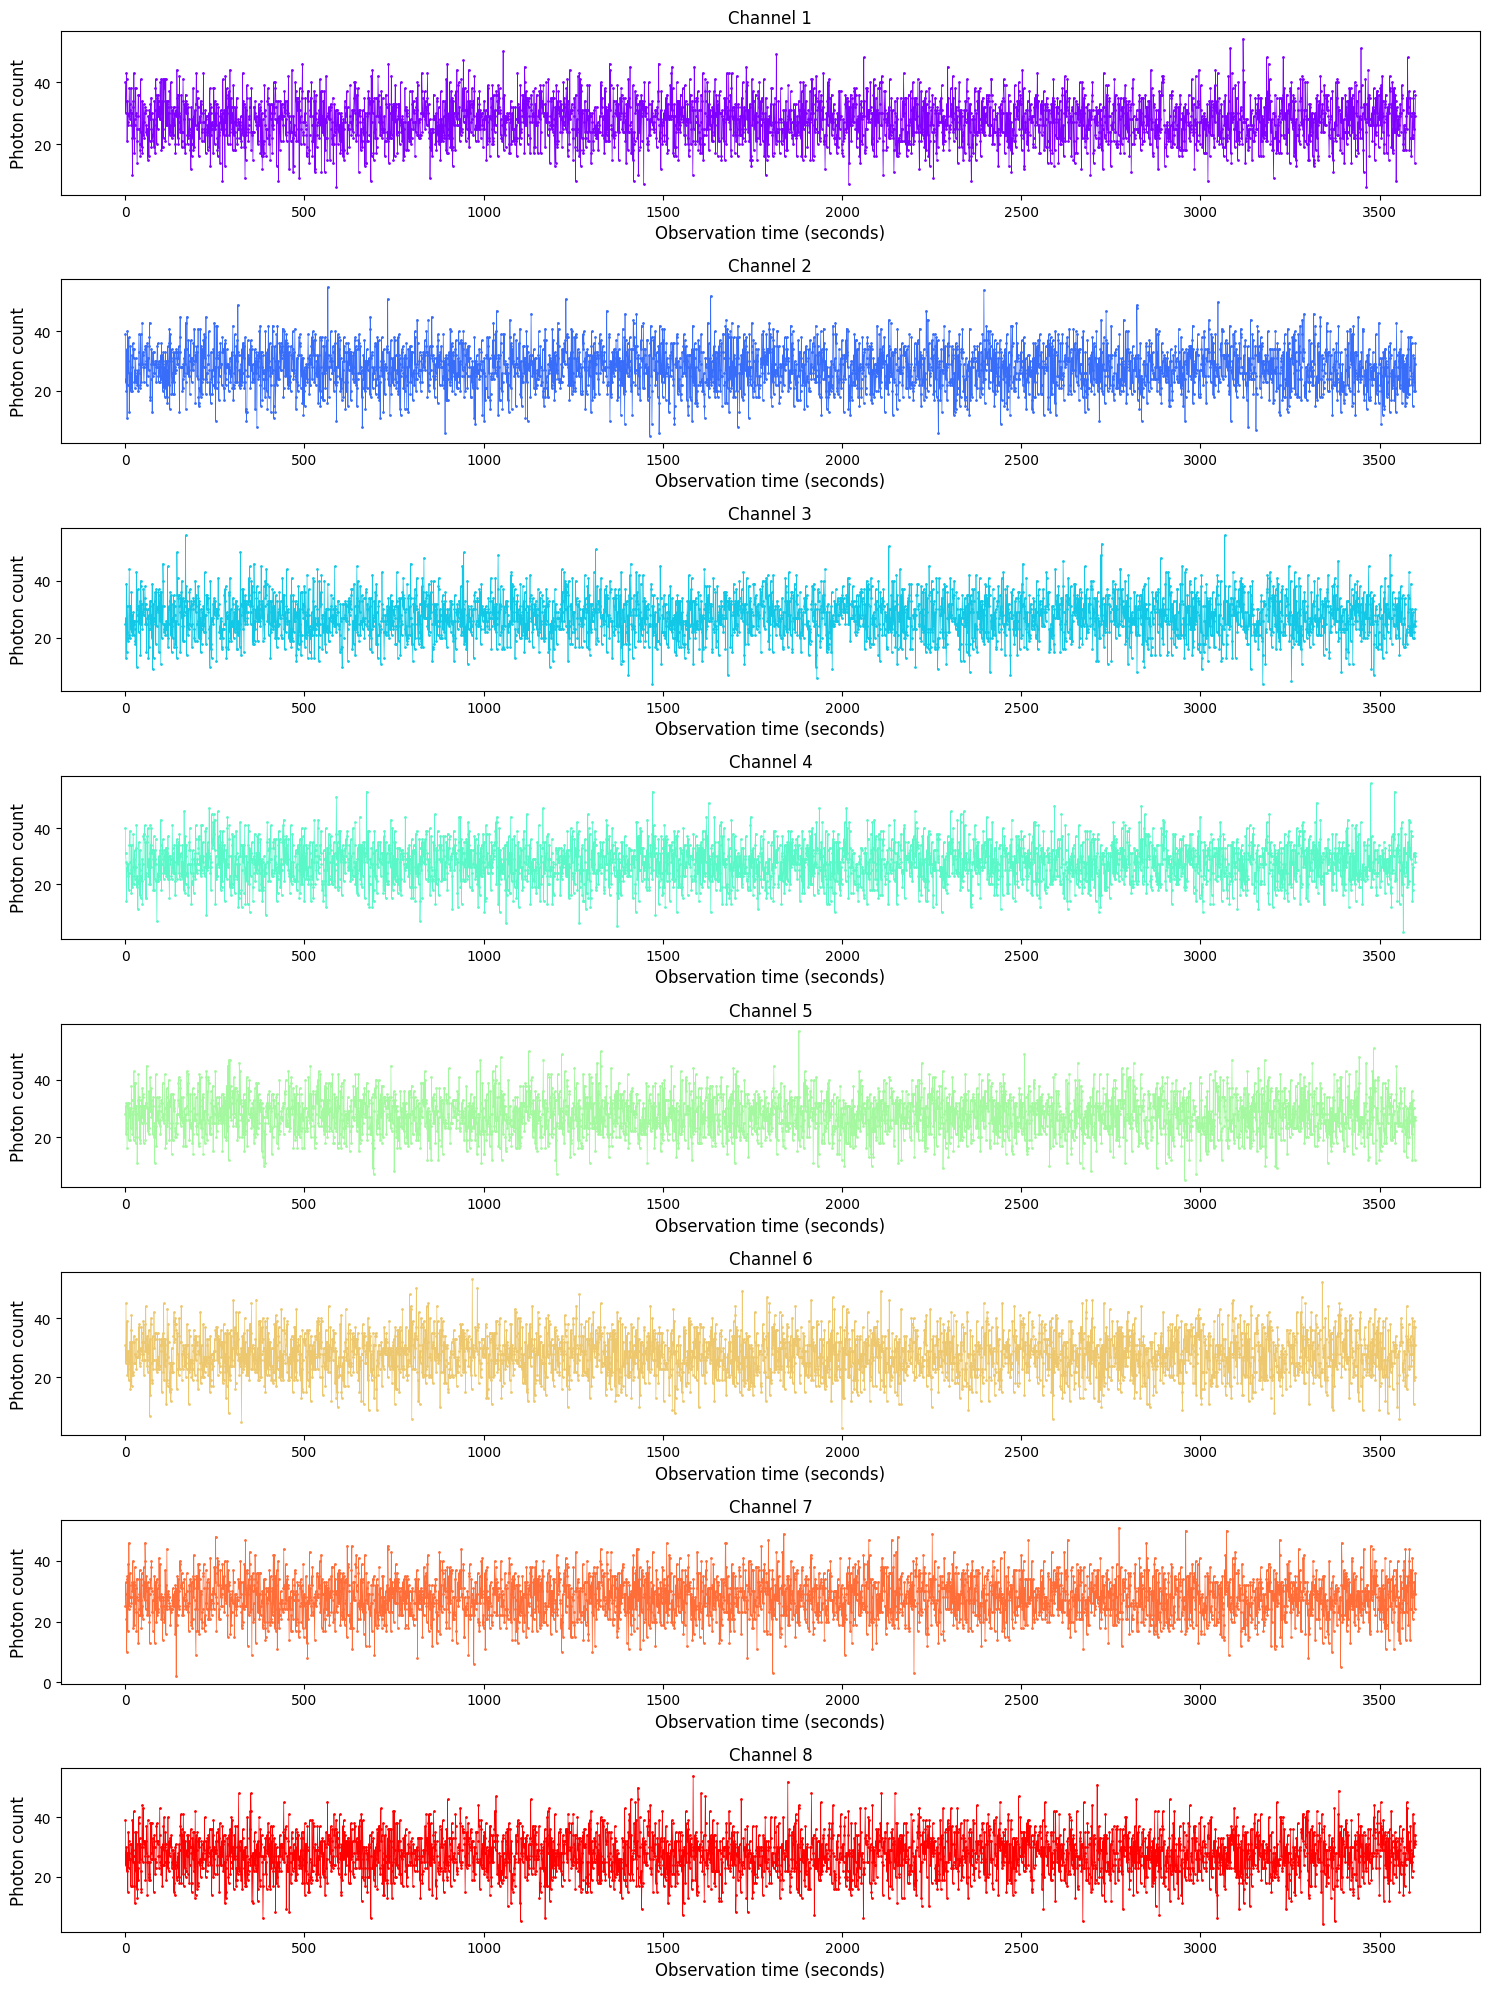

In [21]:
fig, ax = plt.subplots(figsize=(15, 20), nrows=len(data))
for i in range(n_channels):
    time_i, noise_i = data[i]
    ax[i].plot(time_i, noise_i, color=colors[i],  ls='-', lw=0.5, marker='o', markersize=1)
    
    ax[i].set_title(f'Channel {i+1}')
    ax[i].set_ylabel('Photon count', fontsize=12)
    ax[i].set_xlabel('Observation time (seconds)', fontsize=12)

plt.tight_layout() # makes the plot look nice

Awesome! Now you understand how a radio telescope records data and what it looks like.

Take your time to understand the ideas in this notebook.  
It is a lot of information, but it will be very useful later on.

Next, let’s see how we can find **pulsars hiding in the data**.
